In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from matplotlib import pyplot as plt
from astropy    import units

from common import hallmark as hm
from common import io_ipole as io
from common import viz
from common import dalt
from common import mockservation as ms

In [2]:
pf = hm.ParaFrame(
    'model/Illinois_thermal/230GHz/{mag}a{aspin:g}_w{window:d}/img_s{snapshot:d}_Rh{Rhigh:d}_i{inc:d}.h5'
)

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])

inc [50 70]
Rhigh [10 40]
mag ['S']
snapshot [5000 5001 5002 5003 5004 5005 5006 5007 5008 5009 5010 5011 5012 5013
 5014 5015]
aspin [0.94]
window [5]


In [3]:
sel = pf(inc=70)
display(sel)

,path,mag,aspin,window,snapshot,Rhigh,inc
1,model/Illinois_thermal/230GHz/Sa+0.94_w5/img_s...,S,0.94,5,5000,40,70
3,model/Illinois_thermal/230GHz/Sa+0.94_w5/img_s...,S,0.94,5,5001,40,70
5,model/Illinois_thermal/230GHz/Sa+0.94_w5/img_s...,S,0.94,5,5002,40,70
7,model/Illinois_thermal/230GHz/Sa+0.94_w5/img_s...,S,0.94,5,5003,40,70
9,model/Illinois_thermal/230GHz/Sa+0.94_w5/img_s...,S,0.94,5,5004,40,70
...,...,...,...,...,...,...,...
1991,model/Illinois_thermal/230GHz/Sa+0.94_w5/img_s...,S,0.94,5,5995,40,70
1993,model/Illinois_thermal/230GHz/Sa+0.94_w5/img_s...,S,0.94,5,5996,40,70
1995,model/Illinois_thermal/230GHz/Sa+0.94_w5/img_s...,S,0.94,5,5997,40,70
1997,model/Illinois_thermal/230GHz/Sa+0.94_w5/img_s...,S,0.94,5,5998,40,70


In [4]:
imgs = io.load_mov(sel[:100].path)
tmp  = ms.compress(imgs, N=1280)

<AxesSubplot:xlabel='Relative R.A. [$\\mathrm{\\mu as}$]', ylabel='Relative Declination [$\\mathrm{\\mu as}$]'>

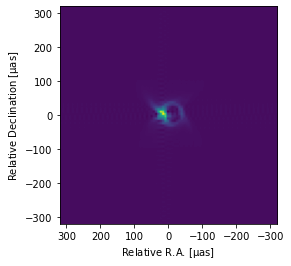

In [5]:
viz.show(tmp, s=0)

(100, 30, 30)
(100, 30, 30)
(100, 30, 30)


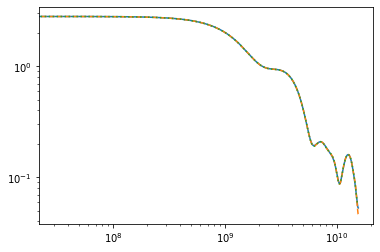

In [6]:
def mkplot(N=400, **kwargs):
    m   = imgs.meta
    tmp = ms.crop(ms.compress(imgs, N=N), m.width, m.height)
    vis = ms.mockserve(tmp, [1024,1024])
    
    print(tmp.shape)
    
    U = vis.uvd[0]
    U = np.linspace(-U/2,U/2,vis.shape[-2],endpoint=False)
    plt.loglog(U, abs(vis[0,:,0]), **kwargs)
    
mkplot(400)
mkplot(800,  linestyle='--')
mkplot(1600, linestyle=':')